<a href="https://colab.research.google.com/github/javagarm/Customer-Segmentation-using-RFM-analysis./blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background information on task - 
 
 - `**Sprocket Central Pty Ltd**` , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 
 
 
#### The client provided KPMG with 3 datasets:
 
 - `**1.Customer Demographic**`
 
 - `**2.Customer Addresses**`
 
 - `**3.Transactions data in the past 3 months**`
 
### Objective

 1. To, review the data quality to ensure that it is ready for our analysis. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.
 
 2. Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 
    - Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.
    
 3. Please develop a dashboard that we can present to the client at our next meeting. Display your data summary and results of the analysis in a dashboard. Maximum of 3 dashboard views/tabs, creativity in layout and presentation is welcome. please find attached a client logo for incorporation.
    - Specifically, your presentation should specify who Sprocket Central Pty Ltd’s marketing team should be targeting out of the new 1000 customer list as well as the broader market segment to reach out to. 
![image.png](attachment:image.png)

In [2]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading The Data

In [4]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [5]:
filepath = "/content/drive/MyDrive/creditcard.csv/KPMG_rawdata_final.xlsx"

transactions = pd.read_excel(filepath, sheet_name='Transactions')
customer_demographic = pd.read_excel(filepath, sheet_name='CustomerDemographic')
customer_add = pd.read_excel(filepath, sheet_name='CustomerAddress')
new_customer_lists = pd.read_excel(filepath, sheet_name='NewCustomerList')


## Exploring the Transactions Dataset

In [6]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
print("Rows : ", transactions.shape[0])
print("Columns : ", transactions.shape[1])

Rows :  20000
Columns :  13


In [11]:
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [12]:
#convert date columns from integer to datetime
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')
transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

#### Note - 

- The values in the `**product_first_sold_date**` columns are not correct as it shows everything happening the same day at different times. We would need to refer back to the author of the data to seek more clasrification on how the data was collected.

In [13]:
transactions.isnull().values.any()

True

In [14]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

**We can decide to drop missing values depending on the objective of our analysis.**

In [15]:
transactions = transactions[-transactions["online_order"].isnull()]
transactions = transactions[-transactions["brand"].isnull()]
transactions = transactions[-transactions["product_line"].isnull()]
transactions = transactions[-transactions["product_class"].isnull()]
transactions = transactions[-transactions["product_size"].isnull()]
transactions = transactions[-transactions["standard_cost"].isnull()]
transactions = transactions[-transactions["product_first_sold_date"].isnull()]
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [16]:
transactions.nunique() #to check for unique values

transaction_id             19445
product_id                   101
customer_id                 3492
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

In [17]:
transactions[transactions.duplicated()]  #to check for duplicate values

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [18]:
transactions.duplicated().sum()

0

In [19]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [20]:
transactions["product_line"].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [21]:
transactions["order_status"].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [22]:
transactions["product_class"].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [23]:
transactions["product_size"].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [24]:
transactions["brand"].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [25]:
transactions["online_order"].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

**All the columns appear to have consistent and correct information.**

In [26]:
# will add "profit" column. Formulae = List price - Standard Cost
transactions["profit"] = transactions["list_price"] - transactions["standard_cost"]

In [27]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82


In [30]:
transactions.isnull().values.any()

False

------------------------------------------------------------------------------------------------------------------------------

## Exploring Customer Demographic Data Set

In [31]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [32]:
customer_demographic.drop("default", axis=1, inplace=True)
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [33]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [34]:
print("Rows : ", customer_demographic.shape[0])
print("Columns : ", customer_demographic.shape[1])

Rows :  4000
Columns :  12


In [35]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [37]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

**We can decide to drop missing values depending on the objective of our analysis.**

 -  Not droping the null values present in Last Name Column as the concerend row has first name which is more than sufficient

In [38]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [39]:
customer_demographic = customer_demographic[-customer_demographic["DOB"].isnull()]
customer_demographic = customer_demographic[-customer_demographic["job_title"].isnull()]
customer_demographic = customer_demographic[-customer_demographic["job_industry_category"].isnull()]
customer_demographic = customer_demographic[-customer_demographic["tenure"].isnull()]
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2865 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2865 non-null   int64         
 1   first_name                           2865 non-null   object        
 2   last_name                            2780 non-null   object        
 3   gender                               2865 non-null   object        
 4   past_3_years_bike_related_purchases  2865 non-null   int64         
 5   DOB                                  2865 non-null   datetime64[ns]
 6   job_title                            2865 non-null   object        
 7   job_industry_category                2865 non-null   object        
 8   wealth_segment                       2865 non-null   object        
 9   deceased_indicator                   2865 non-null   object        
 10  owns_car    

In [40]:
customer_demographic.nunique()

customer_id                            2865
first_name                             2389
last_name                              2707
gender                                    5
past_3_years_bike_related_purchases     100
DOB                                    2611
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [41]:
#Gender

customer_demographic.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal'], dtype=object)

In [42]:
customer_demographic["gender"] = customer_demographic["gender"].replace(["F","Femal"],"Female")
customer_demographic["gender"] = customer_demographic["gender"].replace(["U"],"Undefined")

customer_demographic.gender.unique()

array(['Female', 'Male', 'Undefined'], dtype=object)

In [43]:
customer_demographic.gender.value_counts()

Female       1483
Male         1381
Undefined       1
Name: gender, dtype: int64

In [44]:
#Age
customer_demographic.DOB

0      1953-10-12
1      1980-12-16
2      1954-01-20
8      1973-03-10
9      1988-10-11
          ...    
3992   1974-12-05
3993   1989-04-07
3994   1975-12-12
3995   1975-08-09
3996   2001-07-13
Name: DOB, Length: 2865, dtype: datetime64[ns]

In [45]:
customer_demographic['year'] = pd.DatetimeIndex(customer_demographic['DOB']).year
customer_demographic['month'] = pd.DatetimeIndex(customer_demographic['DOB']).month

customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10


In [46]:
customer_demographic['age'] = 2021- customer_demographic['year']
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33


In [47]:
customer_demographic[customer_demographic['age'] >= 90]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age
33,34,Jephthah,Bachmann,Undefined,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1843,12,178
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,1931,10,90


#### Note-
`**customer_id - 34**` : Age is coming `**178**` which is not a correct age hence will drop this value.

In [48]:
customer_demographic.drop(33, inplace = True) 

In [49]:
customer_demographic[customer_demographic['age'] >= 90]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,1931,10,90


In [50]:
customer_demographic.gender.value_counts()

Female    1483
Male      1381
Name: gender, dtype: int64

In [51]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 3996
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

In [52]:
customer_demographic["job_title"].value_counts()

Social Worker                   42
Sales Representative            38
Dental Hygienist                37
Chemical Engineer               37
Cost Accountant                 36
                                ..
Accounting Assistant IV          2
Human Resources Assistant IV     2
Research Assistant III           2
Developer I                      1
Database Administrator II        1
Name: job_title, Length: 195, dtype: int64

In [53]:
customer_demographic["job_industry_category"].value_counts()

Manufacturing         695
Financial Services    682
Health                543
Retail                305
Property              231
IT                    126
Entertainment         122
Argiculture            99
Telecommunications     61
Name: job_industry_category, dtype: int64

In [54]:
customer_demographic["wealth_segment"].value_counts()

Mass Customer        1427
High Net Worth        734
Affluent Customer     703
Name: wealth_segment, dtype: int64

In [55]:
customer_demographic["owns_car"].value_counts()

Yes    1463
No     1401
Name: owns_car, dtype: int64

## Exploring Customer Address Data Type

In [56]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [57]:
customer_add.isnull().values.any()

False

In [58]:
customer_add.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [59]:
customer_add["state"].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [60]:
customer_add["state"] = customer_add["state"].replace(["NSW"],"New South Wales")
customer_add["state"] = customer_add["state"].replace(["VIC"],"Victoria")
customer_add["state"].value_counts()

New South Wales    2140
Victoria           1021
QLD                 838
Name: state, dtype: int64

In [61]:
customer_add.country.value_counts()

Australia    3999
Name: country, dtype: int64

## Exploring New Customer List Dataset

In [62]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.47,0.5875,0.734375,0.624219,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1.04,1.0400,1.300000,1.105000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.44,0.4400,0.440000,0.440000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.74,0.9250,0.925000,0.925000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.78,0.7800,0.975000,0.975000,4,4,1.703125


In [63]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [64]:
new_customer_lists.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             188
Unnamed: 19                             331
Unnamed: 20                             324
Rank                                    324
Value                           

In [65]:
new_customer_lists.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [66]:
new_customer_lists[new_customer_lists.gender == "U"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,0.80,0.8000,0.800000,0.680000,57,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,1.01,1.2625,1.578125,1.578125,226,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,0.58,0.7250,0.725000,0.616250,324,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,0.70,0.7000,0.700000,0.700000,358,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,0.85,1.0625,1.062500,0.903125,361,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,0.81,0.8100,0.810000,0.688500,375,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,0.94,0.9400,0.940000,0.799000,433,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,0.53,0.6625,0.828125,0.703906,436,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,1.06,1.0600,1.060000,0.901000,575,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,0.72,0.7200,0.900000,0.900000,599,599,0.775000


In [67]:
new_customer_lists.gender = new_customer_lists.drop([59,226,324,358,360,374,434,439,574,598,664,751,775,835,883,904,984],inplace=True)

In [68]:
new_customer_lists[new_customer_lists.gender == "U"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [69]:
# Drop Unnamed Column
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Rank','Value']
new_customer_lists = new_customer_lists.drop(cols, axis=1)

In [70]:
# Check for null values
new_customer_lists.isnull().sum()

first_name                               0
last_name                               29
gender                                 983
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

**We will decide what to do with the missing values based on the objective of our analysis.**

In [71]:
# Checking for duplicate values
new_customer_lists.duplicated().sum()

0

**There are no duplicate values in the dataset**

In [72]:
new_customer_lists.DOB

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 983, dtype: datetime64[ns]

In [73]:
new_customer_lists['year'] = pd.DatetimeIndex(new_customer_lists['DOB']).year
new_customer_lists['month'] = pd.DatetimeIndex(new_customer_lists['DOB']).month
new_customer_lists['age'] = 2021- new_customer_lists['year']

new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,Chickie,Brister,None,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,None,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1970,3,51
2,Ardelis,Forrester,None,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1974,8,47
3,Lucine,Stutt,None,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,None,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,1965,9,56


In [74]:
new_customer_lists[new_customer_lists['age'] >= 90]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age


In [75]:
new_customer_lists["state"] = new_customer_lists["state"].replace(["NSW"],"New South Wales")
new_customer_lists["state"] = new_customer_lists["state"].replace(["VIC"],"Victoria")
new_customer_lists["state"].value_counts()

New South Wales    499
Victoria           258
QLD                226
Name: state, dtype: int64

In [76]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,Chickie,Brister,None,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,None,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,Ardelis,Forrester,None,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,Lucine,Stutt,None,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,None,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


-----------------------------------------------------------------------------------------------------------------------------

## Merging of all datasets for proper analysis at futher stage

In [77]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,Chickie,Brister,None,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,None,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,Ardelis,Forrester,None,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,Lucine,Stutt,None,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,None,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


In [78]:
# adding customer_id column in new_customer_lists
customer_demographic['customer_id'].iloc[-1]

3997

In [79]:
# We need to add 'Customer Id' column to new_customer_lists to enable us merge the tables vertically

new_customer_lists.insert(0, 'customer_id', range(3998, 3998 + len(new_customer_lists)))

In [80]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,3998,Chickie,Brister,None,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,3999,Morly,Genery,None,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,4000,Ardelis,Forrester,None,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,4001,Lucine,Stutt,None,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,4002,Melinda,Hadlee,None,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


**We need to merge the Customer Demographic with the Customer Address table**

In [81]:
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9


In [82]:
# Merge dataframes using the customer_id column
customer_demographic = pd.merge(customer_demographic, customer_add, how='left', on='customer_id')

In [83]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN


In [84]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

In [85]:
customer_demographic["age_group"] = pd.cut(customer_demographic.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

In [86]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN,30-40


In [87]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,3998,Chickie,Brister,None,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,3999,Morly,Genery,None,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,4000,Ardelis,Forrester,None,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,4001,Lucine,Stutt,None,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,4002,Melinda,Hadlee,None,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


In [88]:
new_customer_lists["age_group"] = pd.cut(new_customer_lists.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

In [89]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age,age_group
0,3998,Chickie,Brister,None,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64,60+
1,3999,Morly,Genery,None,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51,50-60
2,4000,Ardelis,Forrester,None,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47,40-50
3,4001,Lucine,Stutt,None,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42,40-50
4,4002,Melinda,Hadlee,None,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56,50-60


In [90]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN,30-40


In [91]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          983 non-null    int64         
 1   first_name                           983 non-null    object        
 2   last_name                            954 non-null    object        
 3   gender                               0 non-null      object        
 4   past_3_years_bike_related_purchases  983 non-null    int64         
 5   DOB                                  983 non-null    datetime64[ns]
 6   job_title                            878 non-null    object        
 7   job_industry_category                818 non-null    object        
 8   wealth_segment                       983 non-null    object        
 9   deceased_indicator                   983 non-null    object        
 10  owns_car      

In [92]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

**From the above we can see that both dataframe:-
 - 1. `**new_customer_lists**` 
 - 2. `**customer_dempgraphic**`
 have equal columns and have been merged with `**customer_add**`

#### Now will merge both data sets i.e `**new_customer_lists & customer_demographic**`

In [93]:
new_df = pd.concat([customer_demographic, new_customer_lists], ignore_index=True, sort=False)

In [94]:
new_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,4976,Ferdinand,Romanetti,None,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,1959,10,62,2 Sloan Way,2200.0,New South Wales,Australia,7.0,60+
3843,4977,Burk,Wortley,None,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,2001,10,20,04 Union Crossing,2196.0,New South Wales,Australia,10.0,<30
3844,4978,Melloney,Temby,None,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,1954,10,67,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,60+
3845,4979,Dickie,Cubbini,None,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19.0,1952,12,69,57666 Victoria Way,4215.0,QLD,Australia,2.0,60+


**We would assign the new dataframe to customer demographic where we will use one dataframe to capture all the customer information.**

In [95]:
customer_demographic = new_df

In [96]:
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,4976,Ferdinand,Romanetti,None,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,1959,10,62,2 Sloan Way,2200.0,New South Wales,Australia,7.0,60+
3843,4977,Burk,Wortley,None,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,2001,10,20,04 Union Crossing,2196.0,New South Wales,Australia,10.0,<30
3844,4978,Melloney,Temby,None,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,1954,10,67,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,60+
3845,4979,Dickie,Cubbini,None,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19.0,1952,12,69,57666 Victoria Way,4215.0,QLD,Australia,2.0,60+


### Merge Transction dataframe with customer demographic dataframe to make a one single dataframe to perform analysis

In [97]:
transactions_exsistingcustomer = transactions

In [98]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82


##### For Existing Customers dataframe

In [99]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","gender"]], on="customer_id", how="left")

In [100]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,Male
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,NaN


In [101]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","past_3_years_bike_related_purchases"]], on="customer_id", how="left")

In [102]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","age"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","age_group"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","job_title"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","job_industry_category"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","wealth_segment"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","owns_car"]], on="customer_id", how="left")


In [103]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","postcode"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","state"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","property_valuation"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","country"]], on="customer_id", how="left")


In [104]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male,19.0,66.0,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,Victoria,6.0,Australia
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,9.0,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,New South Wales,1.0,Australia
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,Male,83.0,59.0,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,New South Wales,10.0,Australia
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
transactions_exsistingcustomer.sort_values(["transaction_date"], ascending=[False])

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country
10617,10905,0,2659,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,100.35,75.26,1970-01-01 10:33:22,25.09,Female,81.0,47.0,40-50,Professor,Argiculture,High Net Worth,Yes,4151.0,QLD,4.0,Australia
2230,2285,95,3216,2017-12-30,1.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,1970-01-01 11:47:38,41.13,Male,59.0,23.0,<30,Database Administrator III,Manufacturing,Mass Customer,Yes,4390.0,QLD,7.0,Australia
7328,7518,65,3433,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,1970-01-01 11:42:25,1028.76,Female,10.0,23.0,<30,Computer Systems Analyst II,Property,Mass Customer,No,3174.0,Victoria,8.0,Australia
1008,1033,49,934,2017-12-30,0.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 09:55:07,133.38,Male,76.0,25.0,<30,Human Resources Manager,Manufacturing,Mass Customer,No,2036.0,New South Wales,12.0,Australia
15799,16258,14,2055,2017-12-30,1.0,Approved,Solex,Standard,high,large,1842.92,1105.75,1970-01-01 09:43:16,737.17,Male,46.0,41.0,40-50,Administrative Assistant III,Retail,High Net Worth,No,2327.0,New South Wales,3.0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15132,15565,46,2543,2017-01-01,1.0,Approved,Solex,Standard,low,medium,1289.85,74.51,1970-01-01 10:57:07,1215.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14782,15205,87,123,2017-01-01,0.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,1592.19,Female,85.0,33.0,30-40,Analyst Programmer,Financial Services,High Net Worth,No,2516.0,New South Wales,8.0,Australia
13551,13934,94,824,2017-01-01,0.0,Approved,Giant Bicycles,Standard,medium,large,1635.30,993.66,1970-01-01 10:33:22,641.64,Female,97.0,44.0,40-50,Financial Advisor,Financial Services,Affluent Customer,Yes,4127.0,QLD,3.0,Australia
14718,15138,3,1022,2017-01-01,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:06:07,1702.55,Female,56.0,31.0,30-40,Assistant Manager,Financial Services,Affluent Customer,Yes,2136.0,New South Wales,10.0,Australia


#### Note - 
  1. Thereby we can see that the most recent transaction happend on `**2017-12-30**`. Which will be the comparison date.
  2. New Column will be created called `**recency**` = **comaprsion date - transaction date**.
     - To understand since when the recent transaction happened.

In [106]:
transactions_exsistingcustomer['transaction_date'] = pd.to_datetime(transactions['transaction_date']).dt.date

In [107]:
transactions_exsistingcustomer["recency"] = 0

In [108]:
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     18899 non-null  object        
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [109]:
transactions_exsistingcustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                        546
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5379
past_3_years_bike_related_purchases    5379
age                                    5379
age_group                              5379
job_title                              5379
job_industry_category                  5379
wealth_segment                         5379
owns_car                               5379
postcode                        

In [110]:
transactions_exsistingcustomer["transaction_date"] = transactions_exsistingcustomer["transaction_date"].replace(np.nan,0,regex=True)

In [111]:
transactions_exsistingcustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5379
past_3_years_bike_related_purchases    5379
age                                    5379
age_group                              5379
job_title                              5379
job_industry_category                  5379
wealth_segment                         5379
owns_car                               5379
postcode                        

In [112]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male,19.0,66.0,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,Victoria,6.0,Australia,0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,9.0,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,New South Wales,1.0,Australia,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,Male,83.0,59.0,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,New South Wales,10.0,Australia,0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [113]:
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  object        
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [114]:
transactions_exsistingcustomer

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male,19.0,66.0,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,Victoria,6.0,Australia,0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,9.0,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,New South Wales,1.0,Australia,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,Male,83.0,59.0,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,New South Wales,10.0,Australia,0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-05-05,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,802.26,Male,1.0,27.0,<30,Help Desk Operator,Manufacturing,Mass Customer,Yes,3109.0,Victoria,10.0,Australia,0
19441,19997,41,127,2017-12-19,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,104.24,Female,81.0,47.0,40-50,Compensation Analyst,Financial Services,Mass Customer,No,4405.0,QLD,1.0,Australia,0
19442,19998,87,2284,2017-05-10,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,1592.19,Female,83.0,47.0,40-50,Staff Accountant IV,Telecommunications,High Net Worth,No,3630.0,Victoria,1.0,Australia,0
19443,19999,6,2764,2017-05-13,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,91.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [115]:
import datetime

comparison_date = datetime.date(2017, 12, 30)

for i in range(19445):
    if transactions_exsistingcustomer['transaction_date'][i] == 0:
        pass
    else:
        x = comparison_date - transactions_exsistingcustomer['transaction_date'][i]
        transactions_exsistingcustomer["recency"][i] = x.days


In [116]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male,19.0,66.0,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,Victoria,6.0,Australia,308
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,223
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,9.0,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,New South Wales,1.0,Australia,75
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,Male,83.0,59.0,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,New South Wales,10.0,Australia,121
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90


In [117]:
transactions_exsistingcustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5379
past_3_years_bike_related_purchases    5379
age                                    5379
age_group                              5379
job_title                              5379
job_industry_category                  5379
wealth_segment                         5379
owns_car                               5379
postcode                        

In [118]:
transactions_exsistingcustomer = transactions_exsistingcustomer[-transactions_exsistingcustomer["gender"].isnull()]
transactions_exsistingcustomer.isnull().sum()

transaction_id                          0
product_id                              0
customer_id                             0
transaction_date                        0
online_order                            0
order_status                            0
brand                                   0
product_line                            0
product_class                           0
product_size                            0
list_price                              0
standard_cost                           0
product_first_sold_date                 0
profit                                  0
gender                                  0
past_3_years_bike_related_purchases     0
age                                     0
age_group                               0
job_title                               0
job_industry_category                   0
wealth_segment                          0
owns_car                                0
postcode                               12
state                             

In [119]:
transactions_exsistingcustomer = transactions_exsistingcustomer[-transactions_exsistingcustomer["postcode"].isnull()]
transactions_exsistingcustomer.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
age_group                              0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
postcode                               0
state                                  0
property_valuati

In [120]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male,19.0,66.0,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,Victoria,6.0,Australia,308
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,223
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,9.0,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,New South Wales,1.0,Australia,75
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,Male,83.0,59.0,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,New South Wales,10.0,Australia,121
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1970-01-01 10:50:31,709.34,Male,3.0,63.0,60+,Web Designer II,Property,Affluent Customer,Yes,2153.0,New South Wales,10.0,Australia,297


In [121]:
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14054 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14054 non-null  int64         
 1   product_id                           14054 non-null  int64         
 2   customer_id                          14054 non-null  int64         
 3   transaction_date                     14054 non-null  object        
 4   online_order                         14054 non-null  float64       
 5   order_status                         14054 non-null  object        
 6   brand                                14054 non-null  object        
 7   product_line                         14054 non-null  object        
 8   product_class                        14054 non-null  object        
 9   product_size                         14054 non-null  object        
 10  list_price

**What we have done is-**
 - We have combined all worksheets together for proper analysis.
 - The new datframe is called : `**transactions_exsistingcustomer**`
 
------------------------------------------------------------------------------------------------------------------------------
 
## Now will be running a RFM Analysis for exsisiting customer

 - RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall.

In [122]:
transactions_exsistingcustomer.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,past_3_years_bike_related_purchases,age,postcode,property_valuation,recency
count,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000
mean,9997.552441,45.613064,1718.680305,0.500356,1110.645960,559.051687,551.594273,49.443290,43.706205,2999.513306,7.469546,176.915967
std,5764.570083,30.492086,1011.286420,0.500018,584.029679,409.094565,493.376642,28.683116,12.572443,859.583893,2.843888,107.999198
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,0.000000,19.000000,2000.000000,1.000000,0.000000
25%,5032.250000,18.000000,831.000000,0.000000,575.270000,215.140000,135.850000,25.000000,34.000000,2199.000000,6.000000,82.000000
50%,9979.500000,44.000000,1719.000000,1.000000,1163.890000,507.580000,445.210000,48.000000,44.000000,2768.000000,8.000000,176.000000
75%,14976.750000,72.000000,2593.000000,1.000000,1635.300000,795.100000,827.160000,74.000000,53.000000,3796.000000,10.000000,270.000000
max,20000.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,1702.550000,99.000000,90.000000,4883.000000,12.000000,363.000000


**Only the transactions made in the last 2 years are considered for analysis.**

In [123]:
transactions_exsistingcustomer=transactions_exsistingcustomer[transactions_exsistingcustomer['recency'] < 730]
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14054 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14054 non-null  int64         
 1   product_id                           14054 non-null  int64         
 2   customer_id                          14054 non-null  int64         
 3   transaction_date                     14054 non-null  object        
 4   online_order                         14054 non-null  float64       
 5   order_status                         14054 non-null  object        
 6   brand                                14054 non-null  object        
 7   product_line                         14054 non-null  object        
 8   product_class                        14054 non-null  object        
 9   product_size                         14054 non-null  object        
 10  list_price

In [124]:
rfmTable = transactions_exsistingcustomer.groupby('customer_id').agg({'recency': lambda x:x.min(), 
                                                                      'product_id': lambda x: len(x), 
                                                                      'profit': lambda x: x.sum()})

rfmTable.rename(columns={'recency': 'recency', 
                         'product_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)

In [125]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,116,3,2226.26
9,103,6,2353.11
12,82,7,3540.03
13,1,7,4337.38


In [126]:
rfmTable

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,116,3,2226.26
9,103,6,2353.11
12,82,7,3540.03
13,1,7,4337.38
...,...,...,...
3493,19,6,3728.88
3494,0,4,2755.11
3495,12,7,3847.65


In [127]:
rfmTable["monetary_value"] = rfmTable["monetary_value"].astype(int)

In [128]:
quartiles = rfmTable.quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.00     0.00       1.00            15.0
0.25     8.00       4.00          1785.5
0.50    35.00       5.00          2799.0
0.75    76.75       7.00          4096.0
0.99   251.00      11.79          8252.0 <class 'pandas.core.frame.DataFrame'>


In [129]:
rfmTable["R_Score"] = 0
rfmTable["F_Score"] = 0
rfmTable["M_Score"] = 0

In [130]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,0,0,0
2,116,3,2226,0,0,0
9,103,6,2353,0,0,0
12,82,7,3540,0,0,0
13,1,7,4337,0,0,0
...,...,...,...,...,...,...
3493,19,6,3728,0,0,0
3494,0,4,2755,0,0,0
3495,12,7,3847,0,0,0


**Calculating R_Score**

In [131]:
rfmTable.index

Int64Index([   1,    2,    9,   12,   13,   14,   15,   19,   20,   21,
            ...
            3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497],
           dtype='int64', name='customer_id', length=2522)

In [132]:
for i in rfmTable.index:
    if (int(rfmTable["recency"][i])) > 76:
        rfmTable["R_Score"][i] = 1
    elif ((int(rfmTable["recency"][i])) <=76) & ((int(rfmTable["recency"][i])) > 35):
        rfmTable["R_Score"][i] = 2
    elif ((int(rfmTable["recency"][i])) <=35) & ((int(rfmTable["recency"][i])) > 8):
        rfmTable["R_Score"][i] = 3
    else:
        rfmTable["R_Score"][i] = 4

In [133]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,0
2,116,3,2226,1,0,0
9,103,6,2353,1,0,0
12,82,7,3540,1,0,0
13,1,7,4337,4,0,0
...,...,...,...,...,...,...
3493,19,6,3728,3,0,0
3494,0,4,2755,4,0,0
3495,12,7,3847,3,0,0


**Calculating F_Score and M_Score**

In [134]:
for i in rfmTable.index:
    if (int(rfmTable["frequency"][i])) > 7:
        rfmTable["F_Score"][i] = 4
    elif ((int(rfmTable["frequency"][i])) <=7) & ((int(rfmTable["frequency"][i])) > 5):
        rfmTable["F_Score"][i] = 3
    elif ((int(rfmTable["frequency"][i])) <=5) & ((int(rfmTable["frequency"][i])) > 4):
        rfmTable["F_Score"][i] = 2
    else:
        rfmTable["F_Score"][i] = 1

In [135]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,4,0
2,116,3,2226,1,1,0
9,103,6,2353,1,3,0
12,82,7,3540,1,3,0
13,1,7,4337,4,3,0
...,...,...,...,...,...,...
3493,19,6,3728,3,3,0
3494,0,4,2755,4,1,0
3495,12,7,3847,3,3,0


In [136]:
for i in rfmTable.index:
    if (int(rfmTable["monetary_value"][i])) > 4096:
        rfmTable["M_Score"][i] = 4
    elif ((int(rfmTable["monetary_value"][i])) <=4096) & ((int(rfmTable["monetary_value"][i])) > 2799):
        rfmTable["M_Score"][i] = 3
    elif ((int(rfmTable["monetary_value"][i])) <=2799) & ((int(rfmTable["monetary_value"][i])) > 1785):
        rfmTable["M_Score"][i] = 2
    else:
        rfmTable["M_Score"][i] = 1

In [137]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,4,3
2,116,3,2226,1,1,2
9,103,6,2353,1,3,2
12,82,7,3540,1,3,3
13,1,7,4337,4,3,4
...,...,...,...,...,...,...
3493,19,6,3728,3,3,3
3494,0,4,2755,4,1,2
3495,12,7,3847,3,3,3


In [138]:
rfmTable["RFM_Value"] = 0

for i in rfmTable.index:
    rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]

In [139]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
customer_id,,,,,,,
1,7,11,3018,4,4,3,443
2,116,3,2226,1,1,2,112
9,103,6,2353,1,3,2,132
12,82,7,3540,1,3,3,133
13,1,7,4337,4,3,4,434
...,...,...,...,...,...,...,...
3493,19,6,3728,3,3,3,333
3494,0,4,2755,4,1,2,412
3495,12,7,3847,3,3,3,333


In [140]:
quartiles = rfmTable["RFM_Value"].quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

0.00    111.00
0.25    160.75
0.50    311.00
0.75    411.00
0.99    444.00
Name: RFM_Value, dtype: float64 <class 'pandas.core.series.Series'>


In [141]:
rfmTable["Customer_Profile"] = " "

In [142]:
for i in rfmTable.index:
    if (int(rfmTable["RFM_Value"][i])) > 411:
        rfmTable["Customer_Profile"][i] = "Platinum Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=411) & ((int(rfmTable["RFM_Value"][i])) > 311):
        rfmTable["Customer_Profile"][i] = "Silver Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=311) & ((int(rfmTable["RFM_Value"][i])) > 160):
        rfmTable["Customer_Profile"][i] = "Gold Customer"
    else:
        rfmTable["Customer_Profile"][i] = "Bronze Customer"

In [143]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value,Customer_Profile
customer_id,,,,,,,,
1,7,11,3018,4,4,3,443,Platinum Customer
2,116,3,2226,1,1,2,112,Bronze Customer
9,103,6,2353,1,3,2,132,Bronze Customer
12,82,7,3540,1,3,3,133,Bronze Customer
13,1,7,4337,4,3,4,434,Platinum Customer
...,...,...,...,...,...,...,...,...
3493,19,6,3728,3,3,3,333,Silver Customer
3494,0,4,2755,4,1,2,412,Platinum Customer
3495,12,7,3847,3,3,3,333,Silver Customer


In [144]:
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()

Customer_Profile
Bronze Customer       76059
Gold Customer        165845
Platinum Customer    242199
Silver Customer      213159
Name: RFM_Value, dtype: int64

In [145]:
df_customerprofile = rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()
df_customerprofile

Customer_Profile
Bronze Customer       76059
Gold Customer        165845
Platinum Customer    242199
Silver Customer      213159
Name: RFM_Value, dtype: int64

In [146]:
df_customerprofile.index

Index(['Bronze Customer', 'Gold Customer', 'Platinum Customer',
       'Silver Customer'],
      dtype='object', name='Customer_Profile')

In [147]:
df_customerprofile.values

array([ 76059, 165845, 242199, 213159])

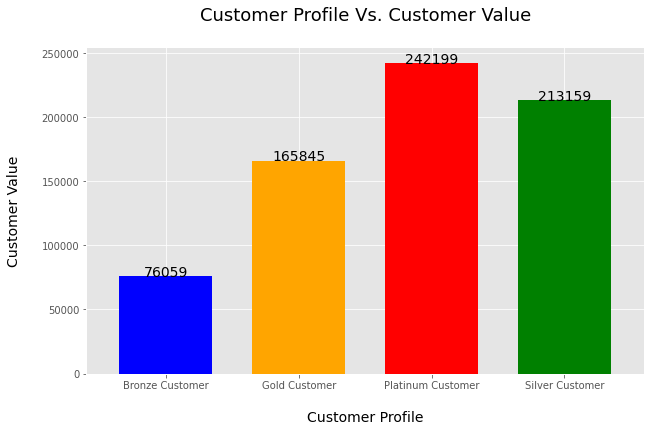

In [148]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title("Customer Profile Vs. Customer Value\n", fontsize=18)
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum().plot(kind="bar", width=0.7, color=["blue","orange","red","green"])
plt.xlabel("\nCustomer Profile", fontsize=14,color="black")
plt.ylabel("Customer Value\n",fontsize=14, color="black")

label = df_customerprofile.values
for i in range(4):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", fontsize=14)

plt.xticks(rotation=0)    

    
plt.show()

**The above bar graph implies that -** 
 - `**Platinum Customer**` has a good range of customers.
 - `**Platinum Customer**` has high customer value as compared to other customer profiles.
 
-----------------------------------------------------------------------------------------------------------------------------

### Age Cluster to shows which wealth segment brings more profit on the tabel

In [149]:
res1 = pd.pivot_table(data=transactions_exsistingcustomer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum)
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,396007.92,335764.77,692526.75
30-40,334178.62,372241.23,681114.78
40-50,626030.45,681495.37,1356499.08
50-60,340137.99,360956.51,676747.74
60+,233502.02,215472.67,449430.01


In [150]:
res1["Affluent Customer"] = res1["Affluent Customer"].astype(int)
res1["High Net Worth"] = res1["High Net Worth"].astype(int)
res1["Mass Customer"] = res1["Mass Customer"].astype(int)

In [151]:
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,396007,335764,692526
30-40,334178,372241,681114
40-50,626030,681495,1356499
50-60,340137,360956,676747
60+,233502,215472,449430


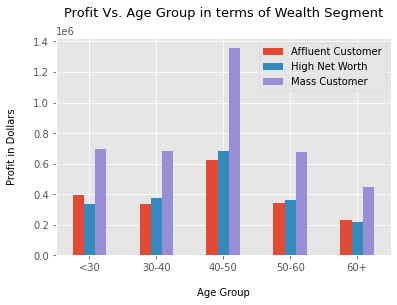

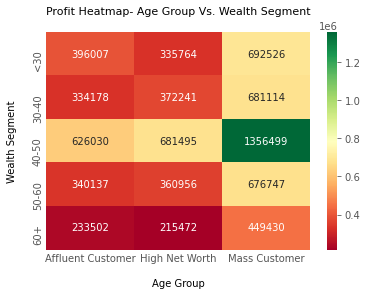

In [152]:
pd.pivot_table(data=transactions_exsistingcustomer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum).plot(kind='bar')
plt.title("Profit Vs. Age Group in terms of Wealth Segment\n", fontsize=13)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Profit in Dollars\n",fontsize=10, color="black")
plt.legend(loc='upper right',fontsize=10)
plt.xticks(rotation=0)

plt.figure(figsize=[13,4])
plt.subplot(1,2,1)

plt.title("Profit Heatmap- Age Group Vs. Wealth Segment\n", fontsize=11)
ax = sns.heatmap(res1, annot=True, cmap="RdYlGn", fmt='d')
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Wealth Segment\n",fontsize=10,color="black")
plt.show()

plt.show()

**From the above heatmap and bar graph**

- Age Group `**40-50**` giving the highest profit.
  - Based on that the wealth segment `**Mass Customers**` has overall performance better.
  
------------------------------------------------------------------------------------------------------------------------------
  

### Find number of cars owned as per the location

In [153]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency'],
      dtype='object')

In [154]:
transactions_exsistingcustomer["owns_car"].value_counts()

Yes    7111
No     6943
Name: owns_car, dtype: int64

In [155]:
transactions_exsistingcustomer["owns_car_flag"]=np.where(transactions_exsistingcustomer["owns_car"]=="Yes",1,0)

In [156]:
transactions_exsistingcustomer.groupby(["state","owns_car"])["owns_car_flag"].count()

state            owns_car
New South Wales  No          3647
                 Yes         3791
QLD              No          1555
                 Yes         1555
Victoria         No          1741
                 Yes         1765
Name: owns_car_flag, dtype: int64

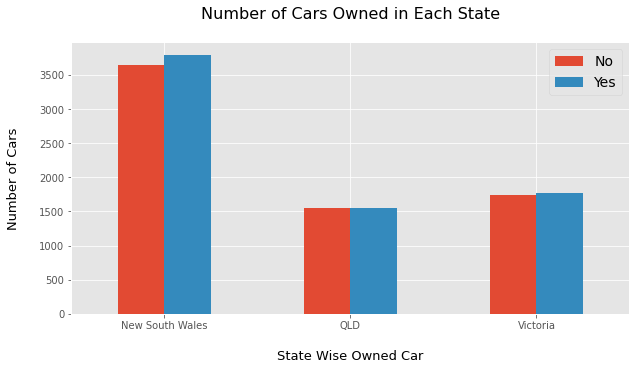

In [157]:
pd.pivot_table(data=transactions_exsistingcustomer, index="state", columns="owns_car", values="owns_car_flag",aggfunc='count').plot(kind='bar',figsize=[10,5])
plt.title("Number of Cars Owned in Each State\n", fontsize=16)
plt.xlabel("\nState Wise Owned Car", fontsize=13,color="black")
plt.ylabel("Number of Cars\n",fontsize=13, color="black")
plt.legend(loc='upper right',fontsize=14)
plt.xticks(rotation=0)

plt.show()

**From the above bar graph implies**
 - `New South Wales` holds high number of owned cars as compared to other states of Australia.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find total bikes purchased by each customer based on his/her job_industry

In [158]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [159]:
transactions_exsistingcustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count()

job_industry_category
Argiculture            485
Entertainment          625
Financial Services    3341
Health                2733
IT                     584
Manufacturing         3432
Property              1091
Retail                1451
Telecommunications     312
Name: past_3_years_bike_related_purchases, dtype: int64

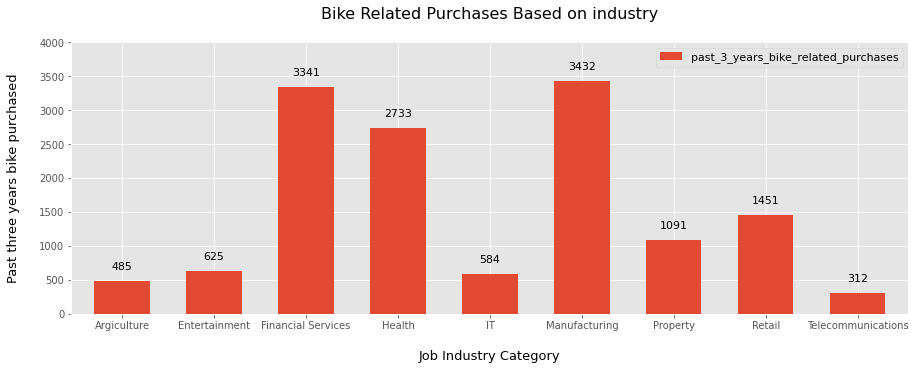

In [160]:
transactions_exsistingcustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Bike Related Purchases Based on industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Past three years bike purchased\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(0,4500,500))

plt.legend(loc='upper right',fontsize=11)

label = transactions_exsistingcustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count()
for i in range(9):
    plt.text(x = i, y = label[i], s = str("\n"+str(int(label[i]))+"\n"),horizontalalignment='center',rotation = 360, color = "black", fontsize=11)


plt.show()

**From the bar graph**
 - Industry like - `**Manufacturing & Financial Services**` holds a high record in terms of bike purchased in last 3 years.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find which industry sector brings up the highest profit on the tabel

In [161]:
transactions_exsistingcustomer.groupby("job_industry_category")["profit"].sum().round()

job_industry_category
Argiculture            256388.0
Entertainment          345259.0
Financial Services    1898996.0
Health                1480275.0
IT                     318906.0
Manufacturing         1868154.0
Property               597923.0
Retail                 818723.0
Telecommunications     167483.0
Name: profit, dtype: float64

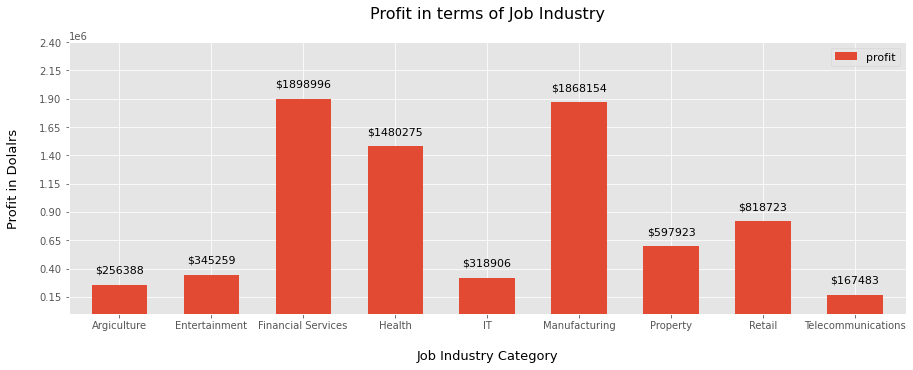

In [162]:
transactions_exsistingcustomer.groupby("job_industry_category")["profit"].sum().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Profit in terms of Job Industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Profit in Dolalrs\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(150000,2500000,250000))
plt.legend(loc='upper right',fontsize=11)

label = transactions_exsistingcustomer.groupby("job_industry_category")["profit"].sum().round()
for i in range(9):
    plt.text(x = i, y = label[i], s = str("\n"+"$"+str(int(label[i]))+"\n"),horizontalalignment='center',rotation = 360, color = "black", fontsize=11)

plt.show()

**From the bar graph**
 - Industry like - `**Manufacturing & Financial Services**` holds high profit.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find the past 3 years bike purachsed on the bases of gender and age group

In [163]:
pd.pivot_table(data=transactions_exsistingcustomer, index="gender", columns="age_group", values="past_3_years_bike_related_purchases",aggfunc='count')


age_group,<30,30-40,40-50,50-60,60+
gender,,,,,
Female,1280,1248,2536,1235,836
Male,1324,1207,2354,1202,832


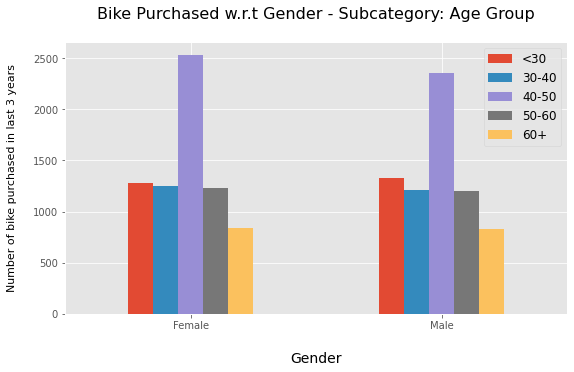

In [164]:
pd.pivot_table(data=transactions_exsistingcustomer, index="gender", columns="age_group", values="past_3_years_bike_related_purchases",aggfunc='count').plot(kind='bar',figsize=[9,5])

plt.title("Bike Purchased w.r.t Gender - Subcategory: Age Group\n", fontsize=16)
plt.xlabel("\nGender", fontsize=14,color="black")
plt.ylabel("Number of bike purchased in last 3 years\n",fontsize=11, color="black")
plt.legend(loc='upper right',fontsize=12)
plt.xticks(rotation=0)

plt.show()

**From the above bar graph**
 - Age group `**40-50**` has high count in terms of bike purchased in last 3 years within that Female ratio a bit higher.
 
 
-------------------------------------------------------------------------------------------------------------------------------


## Data Frame of Only High Value Customers

In [165]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [166]:
df1 = transactions_exsistingcustomer[transactions_exsistingcustomer["age_group"]=="40-50"]
df1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,223,1
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,9.0,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,New South Wales,1.0,Australia,75,0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 09:29:25,15.08,Male,56.0,43.0,40-50,Food Chemist,Health,Mass Customer,Yes,2155.0,New South Wales,10.0,Australia,253,1
11,12,61,2783,2017-01-05,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,1970-01-01 11:42:52,14.23,Male,14.0,43.0,40-50,Sales Representative,Retail,Affluent Customer,Yes,2171.0,New South Wales,9.0,Australia,359,1
15,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:31:13,1702.55,Male,56.0,46.0,40-50,Assistant Manager,Health,Mass Customer,Yes,3031.0,Victoria,8.0,Australia,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,19977,44,1102,2017-12-11,0.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,1970-01-01 10:45:50,1660.88,Female,16.0,45.0,40-50,Recruiting Manager,Manufacturing,Affluent Customer,No,2647.0,New South Wales,3.0,Australia,19,0
19434,19990,55,135,2017-07-23,1.0,Cancelled,Trek Bicycles,Road,medium,large,1894.19,598.76,1970-01-01 10:30:23,1295.43,Female,18.0,46.0,40-50,Internal Auditor,IT,Mass Customer,No,3201.0,Victoria,6.0,Australia,160,0
19439,19995,9,718,2017-11-07,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,1970-01-01 10:36:56,75.14,Female,38.0,43.0,40-50,Engineer I,Manufacturing,Mass Customer,Yes,4217.0,QLD,11.0,Australia,53,1
19441,19997,41,127,2017-12-19,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,104.24,Female,81.0,47.0,40-50,Compensation Analyst,Financial Services,Mass Customer,No,4405.0,QLD,1.0,Australia,11,0


In [167]:
df2 = df1[df1["wealth_segment"]=="Mass Customer"]
df2

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,223,1
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 09:29:25,15.08,Male,56.0,43.0,40-50,Food Chemist,Health,Mass Customer,Yes,2155.0,New South Wales,10.0,Australia,253,1
15,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:31:13,1702.55,Male,56.0,46.0,40-50,Assistant Manager,Health,Mass Customer,Yes,3031.0,Victoria,8.0,Australia,81,1
17,18,33,1842,2017-06-02,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 09:24:48,144.26,Male,89.0,44.0,40-50,Accountant IV,Financial Services,Mass Customer,No,2250.0,New South Wales,8.0,Australia,211,0
20,21,27,1582,2017-10-09,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,1970-01-01 10:05:34,110.81,Male,32.0,43.0,40-50,Office Assistant III,Property,Mass Customer,No,2101.0,New South Wales,11.0,Australia,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,19950,85,3336,2017-12-29,1.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,1970-01-01 10:13:53,547.28,Male,47.0,42.0,40-50,Research Assistant IV,Manufacturing,Mass Customer,Yes,4820.0,QLD,1.0,Australia,1,1
19405,19961,42,3196,2017-05-29,0.0,Approved,OHM Cycles,Road,medium,small,1810.00,1610.90,1970-01-01 10:58:46,199.10,Female,11.0,44.0,40-50,Engineer IV,Health,Mass Customer,No,3977.0,Victoria,7.0,Australia,215,0
19434,19990,55,135,2017-07-23,1.0,Cancelled,Trek Bicycles,Road,medium,large,1894.19,598.76,1970-01-01 10:30:23,1295.43,Female,18.0,46.0,40-50,Internal Auditor,IT,Mass Customer,No,3201.0,Victoria,6.0,Australia,160,0
19439,19995,9,718,2017-11-07,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,1970-01-01 10:36:56,75.14,Female,38.0,43.0,40-50,Engineer I,Manufacturing,Mass Customer,Yes,4217.0,QLD,11.0,Australia,53,1


In [168]:
FS = df2[df2["job_industry_category"] == "Financial Services"]
FS

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
17,18,33,1842,2017-06-02,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 09:24:48,144.26,Male,89.0,44.0,40-50,Accountant IV,Financial Services,Mass Customer,No,2250.0,New South Wales,8.0,Australia,211,0
21,22,37,595,2017-06-29,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,72.0,48.0,40-50,VP Marketing,Financial Services,Mass Customer,No,4305.0,QLD,4.0,Australia,184,0
40,41,44,2570,2017-05-08,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,1970-01-01 10:27:48,1660.88,Male,13.0,44.0,40-50,Professor,Financial Services,Mass Customer,Yes,4812.0,QLD,3.0,Australia,236,1
94,95,45,757,2017-02-26,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 09:27:51,356.50,Male,91.0,44.0,40-50,Environmental Tech,Financial Services,Mass Customer,No,4019.0,QLD,8.0,Australia,307,0
102,104,78,1468,2017-11-12,0.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 10:36:33,1055.82,Female,37.0,43.0,40-50,Financial Advisor,Financial Services,Mass Customer,No,2519.0,New South Wales,9.0,Australia,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19312,19867,38,122,2017-03-02,0.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46,751.02,Male,87.0,42.0,40-50,Quality Control Specialist,Financial Services,Mass Customer,Yes,4817.0,QLD,2.0,Australia,303,1
19318,19874,2,3420,2017-10-22,1.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,Male,96.0,41.0,40-50,Financial Advisor,Financial Services,Mass Customer,Yes,4118.0,QLD,5.0,Australia,69,1
19327,19883,93,326,2017-12-01,0.0,Approved,WeareA2B,Standard,medium,medium,1065.03,230.09,1970-01-01 10:13:53,834.94,Female,74.0,41.0,40-50,Help Desk Operator,Financial Services,Mass Customer,No,2515.0,New South Wales,10.0,Australia,29,0
19381,19937,37,648,2017-10-29,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,86.0,43.0,40-50,Accountant II,Financial Services,Mass Customer,Yes,4551.0,QLD,7.0,Australia,62,1


In [169]:
M = df2[df2["job_industry_category"] == "Manufacturing"]
M

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
22,23,37,2001,2017-04-08,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 11:42:25,1544.61,Female,21.0,44.0,40-50,Analog Circuit Design manager,Manufacturing,Mass Customer,Yes,2800.0,New South Wales,4.0,Australia,266,1
83,84,33,3297,2017-11-02,1.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 09:24:48,144.26,Male,39.0,46.0,40-50,Product Engineer,Manufacturing,Mass Customer,No,3213.0,Victoria,6.0,Australia,58,0
96,97,80,211,2017-05-31,1.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,1970-01-01 10:38:59,139.23,Female,6.0,47.0,40-50,VP Marketing,Manufacturing,Mass Customer,Yes,2159.0,New South Wales,10.0,Australia,213,1
117,119,64,1591,2017-03-21,0.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,1970-01-01 10:44:07,872.89,Male,4.0,45.0,40-50,Operator,Manufacturing,Mass Customer,Yes,2073.0,New South Wales,12.0,Australia,284,1
119,121,25,50,2017-06-16,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1970-01-01 09:24:48,709.34,Male,38.0,41.0,40-50,Account Executive,Manufacturing,Mass Customer,Yes,2047.0,New South Wales,10.0,Australia,197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19270,19823,3,2312,2017-01-22,0.0,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:06:01,1702.55,Female,72.0,42.0,40-50,Assistant Manager,Manufacturing,Mass Customer,No,4350.0,QLD,2.0,Australia,342,0
19299,19853,7,3072,2017-04-12,0.0,Approved,Trek Bicycles,Road,low,medium,980.37,234.43,1970-01-01 11:17:29,745.94,Male,87.0,42.0,40-50,Chemical Engineer,Manufacturing,Mass Customer,Yes,2323.0,New South Wales,5.0,Australia,262,1
19314,19869,61,2496,2017-02-21,0.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,1970-01-01 11:13:30,14.23,Male,29.0,41.0,40-50,Web Developer II,Manufacturing,Mass Customer,Yes,4551.0,QLD,7.0,Australia,312,1
19394,19950,85,3336,2017-12-29,1.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,1970-01-01 10:13:53,547.28,Male,47.0,42.0,40-50,Research Assistant IV,Manufacturing,Mass Customer,Yes,4820.0,QLD,1.0,Australia,1,1


In [170]:
H = df2[df2["job_industry_category"] == "Health"]
H

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,Female,89.0,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,New South Wales,5.0,Australia,223,1
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 09:29:25,15.08,Male,56.0,43.0,40-50,Food Chemist,Health,Mass Customer,Yes,2155.0,New South Wales,10.0,Australia,253,1
15,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:31:13,1702.55,Male,56.0,46.0,40-50,Assistant Manager,Health,Mass Customer,Yes,3031.0,Victoria,8.0,Australia,81,1
26,27,64,2666,2017-04-11,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,1970-01-01 11:24:07,872.89,Male,2.0,50.0,40-50,Occupational Therapist,Health,Mass Customer,No,2151.0,New South Wales,8.0,Australia,263,0
130,132,12,1937,2017-01-18,0.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1970-01-01 10:36:56,1069.55,Male,69.0,47.0,40-50,Quality Engineer,Health,Mass Customer,No,2619.0,New South Wales,3.0,Australia,346,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19120,19672,49,650,2017-02-13,1.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 09:55:07,133.38,Male,81.0,44.0,40-50,Assistant Manager,Health,Mass Customer,No,2565.0,New South Wales,7.0,Australia,320,0
19188,19740,45,2115,2017-06-04,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 10:49:51,356.50,Male,17.0,46.0,40-50,Food Chemist,Health,Mass Customer,Yes,3143.0,Victoria,4.0,Australia,209,1
19241,19793,59,528,2017-10-13,1.0,Approved,Solex,Standard,medium,large,1061.56,733.58,1970-01-01 09:29:30,327.98,Female,10.0,42.0,40-50,Registered Nurse,Health,Mass Customer,No,2576.0,New South Wales,10.0,Australia,78,0
19286,19839,29,650,2017-08-31,0.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,1970-01-01 11:47:38,135.85,Male,81.0,44.0,40-50,Assistant Manager,Health,Mass Customer,No,2565.0,New South Wales,7.0,Australia,121,0


In [171]:
FS = pd.concat([FS, M], ignore_index=True, sort=False)
FS

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
0,18,33,1842,2017-06-02,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 09:24:48,144.26,Male,89.0,44.0,40-50,Accountant IV,Financial Services,Mass Customer,No,2250.0,New South Wales,8.0,Australia,211,0
1,22,37,595,2017-06-29,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,72.0,48.0,40-50,VP Marketing,Financial Services,Mass Customer,No,4305.0,QLD,4.0,Australia,184,0
2,41,44,2570,2017-05-08,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,1970-01-01 10:27:48,1660.88,Male,13.0,44.0,40-50,Professor,Financial Services,Mass Customer,Yes,4812.0,QLD,3.0,Australia,236,1
3,95,45,757,2017-02-26,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 09:27:51,356.50,Male,91.0,44.0,40-50,Environmental Tech,Financial Services,Mass Customer,No,4019.0,QLD,8.0,Australia,307,0
4,104,78,1468,2017-11-12,0.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 10:36:33,1055.82,Female,37.0,43.0,40-50,Financial Advisor,Financial Services,Mass Customer,No,2519.0,New South Wales,9.0,Australia,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,19823,3,2312,2017-01-22,0.0,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:06:01,1702.55,Female,72.0,42.0,40-50,Assistant Manager,Manufacturing,Mass Customer,No,4350.0,QLD,2.0,Australia,342,0
1110,19853,7,3072,2017-04-12,0.0,Approved,Trek Bicycles,Road,low,medium,980.37,234.43,1970-01-01 11:17:29,745.94,Male,87.0,42.0,40-50,Chemical Engineer,Manufacturing,Mass Customer,Yes,2323.0,New South Wales,5.0,Australia,262,1
1111,19869,61,2496,2017-02-21,0.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,1970-01-01 11:13:30,14.23,Male,29.0,41.0,40-50,Web Developer II,Manufacturing,Mass Customer,Yes,4551.0,QLD,7.0,Australia,312,1
1112,19950,85,3336,2017-12-29,1.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,1970-01-01 10:13:53,547.28,Male,47.0,42.0,40-50,Research Assistant IV,Manufacturing,Mass Customer,Yes,4820.0,QLD,1.0,Australia,1,1


In [172]:
FS = pd.concat([FS, H], ignore_index=True, sort=False)
FMH = FS
df_highvalue_customers = FMH

df_highvalue_customers

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender,past_3_years_bike_related_purchases,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
0,18,33,1842,2017-06-02,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 09:24:48,144.26,Male,89.0,44.0,40-50,Accountant IV,Financial Services,Mass Customer,No,2250.0,New South Wales,8.0,Australia,211,0
1,22,37,595,2017-06-29,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,Male,72.0,48.0,40-50,VP Marketing,Financial Services,Mass Customer,No,4305.0,QLD,4.0,Australia,184,0
2,41,44,2570,2017-05-08,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,1970-01-01 10:27:48,1660.88,Male,13.0,44.0,40-50,Professor,Financial Services,Mass Customer,Yes,4812.0,QLD,3.0,Australia,236,1
3,95,45,757,2017-02-26,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 09:27:51,356.50,Male,91.0,44.0,40-50,Environmental Tech,Financial Services,Mass Customer,No,4019.0,QLD,8.0,Australia,307,0
4,104,78,1468,2017-11-12,0.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 10:36:33,1055.82,Female,37.0,43.0,40-50,Financial Advisor,Financial Services,Mass Customer,No,2519.0,New South Wales,9.0,Australia,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,19672,49,650,2017-02-13,1.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 09:55:07,133.38,Male,81.0,44.0,40-50,Assistant Manager,Health,Mass Customer,No,2565.0,New South Wales,7.0,Australia,320,0
1697,19740,45,2115,2017-06-04,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 10:49:51,356.50,Male,17.0,46.0,40-50,Food Chemist,Health,Mass Customer,Yes,3143.0,Victoria,4.0,Australia,209,1
1698,19793,59,528,2017-10-13,1.0,Approved,Solex,Standard,medium,large,1061.56,733.58,1970-01-01 09:29:30,327.98,Female,10.0,42.0,40-50,Registered Nurse,Health,Mass Customer,No,2576.0,New South Wales,10.0,Australia,78,0
1699,19839,29,650,2017-08-31,0.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,1970-01-01 11:47:38,135.85,Male,81.0,44.0,40-50,Assistant Manager,Health,Mass Customer,No,2565.0,New South Wales,7.0,Australia,121,0


**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

-------------------------------------------------------------------------------`**End Of Note Book**`----------------------------------------------------------------------------------------------

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Export Pandas DataFrame to a CSV file

In [173]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [174]:
transactions_exsistingcustomer.to_csv(r"C:\Users\HP\OneDrive\Desktop\KPMG Virtual Internship\Exsisting_Customers_Transactions.csv", 
                                      header=["transaction_id", "product_id", "customer_id","transaction_date","online_order", 
                                              "order_status","brand","product_line","product_class","product_size", 
                                              "list_price","standard_cost","product_first_sold_date","profit","gender","past_3_years_bike_related_purchases", 
                                             "age","age_group","job_title","job_industry_category","wealth_segment","owns_car","postcode","state", 
                                             "property_valuation","country","recency","owns_car_flag"], index=False)

In [175]:
df_highvalue_customers.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [177]:
df_highvalue_customers.to_csv(r"/content/drive/MyDrive/creditcard.csv", 
                                      header=["transaction_id", "product_id", "customer_id","transaction_date","online_order", 
                                              "order_status","brand","product_line","product_class","product_size", 
                                              "list_price","standard_cost","product_first_sold_date","profit","gender","past_3_years_bike_related_purchases", 
                                             "age","age_group","job_title","job_industry_category","wealth_segment","owns_car","postcode","state", 
                                             "property_valuation","country","recency","owns_car_flag"], index=False)

IsADirectoryError: ignored

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
